# Case Study: Wine Quality
in this Jupyter notebook we will be analysing data of red and white wine from a dataset of the UCI - follow this [link](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) to download the data, since it will not be stored in the repository.

In [25]:
# import pandas and csv file. IMPORTANT! csv file is separated by ";"
import pandas as pd
df_red = pd.read_csv('winequality-red.csv', sep = ";")
df_white = pd.read_csv('winequality-white.csv', sep = ";")
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [26]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Let's understand the data we are working with

In [3]:
# get the information about the data type in each dataframe
df_red.info()
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column        

In [5]:
# Number of duplicates in the whitewine dataframe
df_white.duplicated().sum()

937

In [6]:
# Number of unique values for each column in the redwhine dataframe
df_red.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [8]:
df_white.nunique()

fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64

In [10]:
# Statistical information about each column in the redwine dataframe
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Appendig the Data to get one DataFrame

In [14]:
# import numpy
import numpy as np

### Create Color Columns
Create two arrays as long as the number of rows in the red and white dataframes that repeat the value “red” or “white.” NumPy offers really easy way to do this. Here’s the documentation for [NumPy’s repeat](https://docs.scipy.org/doc/numpy/reference/generated/numpy.repeat.html) function.

In [17]:
red_array = np.repeat('RED', len(df_red.index))
white_array = np.repeat('WHITE', df_white.shape[0]) 
print(len(red_array), len(white_array))

1599 4898


Add arrays to the red and white dataframes. Do this by setting a new column called 'color' to the appropriate array.

In [18]:
df_red['color'] = red_array
df_white['color'] = white_array
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,RED
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,RED
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,RED
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,RED
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,RED


### Combine DataFrames with Append
Check the documentation for [Pandas' append](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.append.html) function and use this to combine the dataframes. (Bonus: Why aren't we using the [merge](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) method to combine the dataframes?) If you don’t get it, I’ll show you how afterwards.

In [23]:
wine_df = df_red.append(df_white, ignore_index=True)
wine_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,WHITE
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,WHITE
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,WHITE
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,WHITE
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,WHITE


In [24]:
wine_df.to_csv('winequality_edited.csv', index = False)

# Exploratory Data Analysis (EDA) with Visuals
lets explore the newly created df

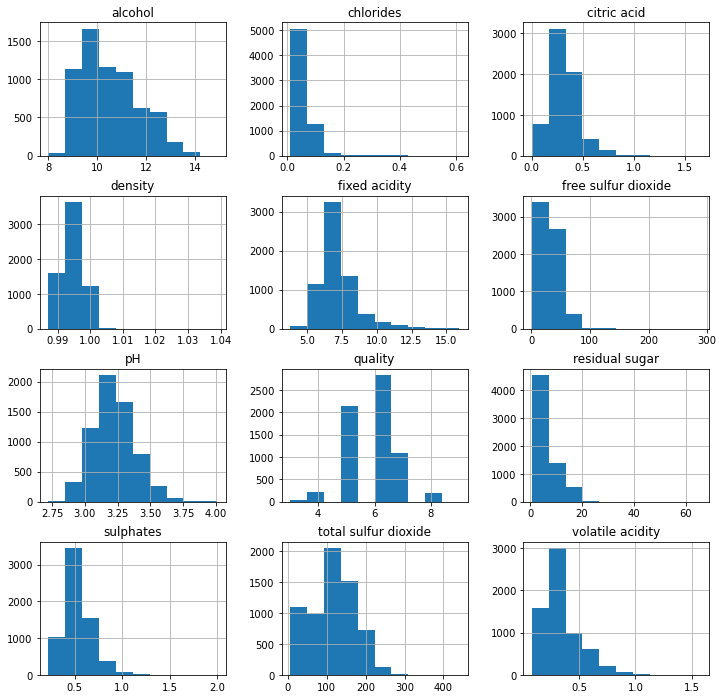

In [28]:
# some histograms
wine_df.hist(figsize = (12, 12));

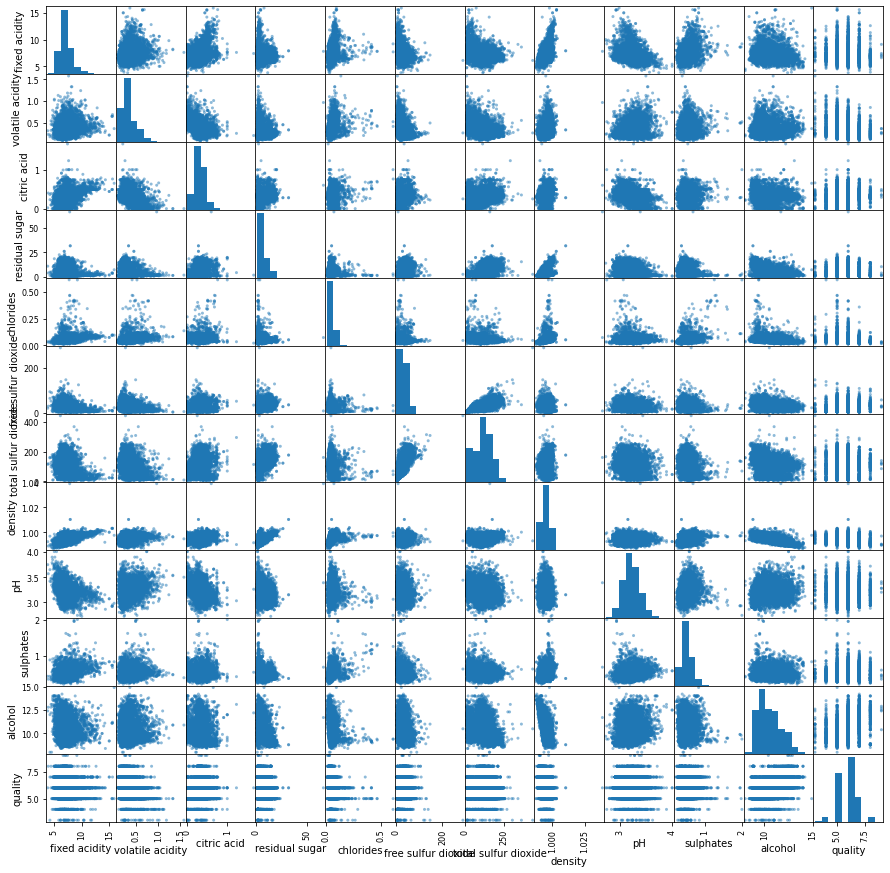

In [30]:
# scatterplot matrix
pd.plotting.scatter_matrix(wine_df, figsize = (15,15));

# Using Groupby to draw conclusions

## Q1: Is a certain type of wine (red or white) associated with higher quality?

In [32]:
# use groupby to find out
wine_df.groupby(['color'])['quality'].mean()

color
RED      5.636023
WHITE    5.877909
Name: quality, dtype: float64

we can see that the mean quality of white wine is greater than the red wine mean quality

## Q2: What level of acidity (pH value) receives the highest average rating?
This question is more tricky because unlike `color`, which has clear categories you can group by (red and white) `pH` is a quantitative variable without clear categories. However, there is a simple fix to this. You can create a categorical variable from a quantitative variable by creating your own categories. [pandas' cut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) function let's you "cut" data in groups. Using this, create a new column called acidity_levels with these categories:

**Acidity Levels**:

   * High: Lowest 25% of pH values
   * Moderately High: 25% - 50% of pH values
   * Medium: 50% - 75% of pH values
   * Low: 75% - max pH value


In [37]:
# find the distribution of the data
wine_df['pH'].describe()

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [49]:
# define the bin's intervals
bin_edges = [2.27, 3.11, 3.21, 3.32, 4.01]

# define the labels
bin_names = ['High', 'Moderately High', 'Medium', 'Low']

In [52]:
# create a new column with the acidity_levels
wine_df['acidity_levels'] = pd.cut(wine_df['pH'], bin_edges, labels = bin_names)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,ph_category,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,RED,Low,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,RED,Moderately High,Moderately High
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,RED,Medium,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,RED,Moderately High,Moderately High
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,RED,Low,Low


In [51]:
wine_df.groupby(['ph_category'])['quality'].mean()

ph_category
High               5.783469
Moderately High    5.784540
Medium             5.850832
Low                5.859593
Name: quality, dtype: float64

# Using the query command to draw conclusions

## Q1: Do wines with higher alcoholic content receive better ratings?

To answer this question, use query to create two groups of wine samples:

   * Low alcohol (samples with an alcohol content less than the median)
   * High alcohol (samples with an alcohol content greater than or equal to the median)

Then, find the mean quality rating of each group.

In [56]:
# get the median and furhter information about the alcohol column
alcohol_median = wine_df['alcohol'].median()
alcohol_min = wine_df['alcohol'].min()
alcohol_max = wine_df['alcohol'].max()

In [58]:
# set the bin's edges
bin_edges_alcohol = [alcohol_min, alcohol_median, alcohol_max]

# set the names of the bins
bin_names_alcohol = ['Low alcohol', 'High alcohol']

In [60]:
# create a column with the alcohol levels
wine_df['alcohol_level'] = pd.cut(wine_df['alcohol'], bin_edges_alcohol, labels = bin_names_alcohol)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,ph_category,acidity_levels,alcohol_level
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,RED,Low,Low,Low alcohol
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,RED,Moderately High,Moderately High,Low alcohol
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,RED,Medium,Medium,Low alcohol
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,RED,Moderately High,Moderately High,Low alcohol
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,RED,Low,Low,Low alcohol


In [62]:
# get the means of quality using groupby
wine_df.groupby(['alcohol_level'])['quality'].mean()

alcohol_level
Low alcohol     5.485575
High alcohol    6.161774
Name: quality, dtype: float64

In [79]:
# get the same result using query()
wine_df_low_alcohol = wine_df.query('alcohol < 10.3')
wine_df_high_alcohol = wine_df.query('alcohol >= 10.3')
wine_df_low_alcohol['quality'].mean(), wine_df_high_alcohol['quality'].mean()

(5.475920679886686, 6.146084337349397)

There are some minor differences in the way we explore the data - groupby depends on the way the bins edges are considered for the classification. However we can clearly see that wines with higher alcohol levels have a higher quality rate.

## Q2: Do sweeter wines (more residual sugar) receive better ratings?

Similarly, use the median to split the samples into two groups by residual sugar and find the mean quality rating of each group.

In [68]:
# find the median 
wine_df['residual sugar'].median()

3.0

In [76]:
# define new dataframes depending on the median
low_sugar = wine_df.query('`residual sugar` < 3.0')
high_sugar = wine_df.query('`residual sugar` >= 3.0')

In [77]:
# get the quality mean for each sugar level (low, high)
low_sugar['quality'].mean(), high_sugar['quality'].mean() 

(5.808800743724822, 5.82782874617737)

# Communicating the conclusions with Matplotlib and Seaborn

### #1: Do wines with higher alcoholic content receive better ratings?
Create a bar chart with one bar for low alcohol and one bar for high alcohol wine samples.

In [116]:
# import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid') # get a nice gray background

In [80]:
# define the quality mean as a separated variable
low_alcohol_qlt_mean = wine_df_low_alcohol['quality'].mean()
high_alcohol_qlt_mean = wine_df_high_alcohol['quality'].mean()

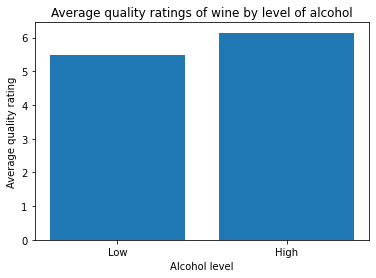

In [84]:
# create a bar chart with proper labels and title
coordinates = [1, 2]
bar_heights = [low_alcohol_qlt_mean, high_alcohol_qlt_mean]
labels = ['Low', 'High']
plt.bar(coordinates, bar_heights, tick_label = labels)
plt.title('Average quality ratings of wine by level of alcohol')
plt.xlabel('Alcohol level')
plt.ylabel('Average quality rating');

### #2: Do sweeter wines receive higher ratings?
Create a bar chart with one bar for low residual sugar and one bar for high residual sugar wine samples.

In [85]:
# again, define the quality average as a separate value
low_sugar_mean = low_sugar['quality'].mean()
high_sugar_mean = high_sugar['quality'].mean()

Text(0, 0.5, 'Average quality rating')

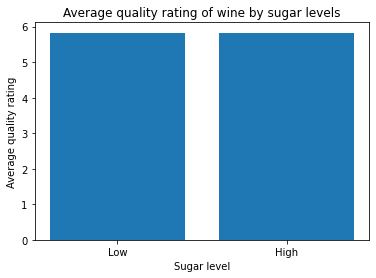

In [86]:
# create a bar plot with all proper labels
coordinates_sugar = [1, 2]
heights_sugar = [low_sugar_mean, high_sugar_mean]
labels = ['Low', 'High']
plt.bar(coordinates_sugar, heights_sugar, tick_label = labels)
plt.title('Average quality rating of wine by sugar levels')
plt.xlabel('Sugar level')
plt.ylabel('Average quality rating')

### #3: What level of acidity receives the highest average rating?
Create a bar chart with a bar for each of the four acidity levels.

In [93]:
# define a variable for each acidity level
acidity_levels_mean_list = wine_df.groupby(['ph_category'])['quality'].mean().to_list()
print(acidity_levels_mean_list)
print(wine_df.groupby(['ph_category'])['quality'].mean())

[5.783469150174621, 5.784540474741327, 5.850832266325224, 5.8595933926302415]
ph_category
High               5.783469
Moderately High    5.784540
Medium             5.850832
Low                5.859593
Name: quality, dtype: float64
range(0, 3)


(5.7, 5.9)

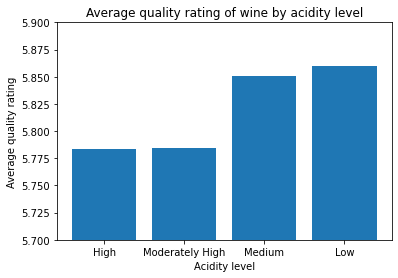

In [98]:
# plot the bar graphic
coordinates_acidity = [1,2,3,4]
heights_acidity = acidity_levels_mean_list
plt.bar(coordinates_acidity, heights_acidity, tick_label = bin_names)
plt.title('Average quality rating of wine by acidity level')
plt.xlabel('Acidity level')
plt.ylabel('Average quality rating')
plt.ylim(bottom=5.7, top=5.9)

# Advanced Plotting - Plotting Wine Type and Quality with Matplotlib

### Create arrays for red bar heights white bar heights
Remember, there's a bar for each combination of color and quality rating. Each bar's height is based on the proportion of samples of that color with that quality rating.
1. Red bar proportions = counts for each quality rating / total # of red samples
2. White bar proportions = counts for each quality rating / total # of white samples

In [102]:
# count the amount of times a red or white wine received an specific rating
wine_type_counts = wine_df.groupby(['color', 'quality']).count()['pH']
wine_type_counts

color  quality
RED    3            10
       4            53
       5           681
       6           638
       7           199
       8            18
WHITE  3            20
       4           163
       5          1457
       6          2198
       7           880
       8           175
       9             5
Name: pH, dtype: int64

since more white wines have been reviewed than red wines, we need to get the counts in relation to the total amount of counts for each type of wine

In [106]:
# get the total amount of counts per wine type
total_count_wine_type = wine_df.groupby('color').count()['pH']
total_count_wine_type

color
RED      1599
WHITE    4898
Name: pH, dtype: int64

this is true, since it matches the number of entries. Now lets call the relative counts "proportions"

In [107]:
# create count variables (in relation / proportion)
red_proportions = wine_type_counts['RED'] / total_count_wine_type['RED']
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
Name: pH, dtype: float64

we need to add a value of "0" for quality ratings of "9", since some wihte wines have been awarded with this qualification

In [111]:
red_proportions['9']=0

In [108]:
white_proportions = wine_type_counts['WHITE'] / total_count_wine_type['WHITE']
white_proportions

quality
3    0.004083
4    0.033279
5    0.297468
6    0.448755
7    0.179665
8    0.035729
9    0.001021
Name: pH, dtype: float64

**this looks great, now it is time to plot these results in a bar chart**. 

Set the x coordinate location for each rating group and width of each bar

In [113]:
ind = np.arange(len(red_proportions)) # defining the x-coordinates 
width = 0.35 # widht of the bars

let's create the plot! **Be careful!** the two graphs should be next to each other, which means that they are shifted (or moved) by the "width" - take this into account when defining the *x-coordinates*

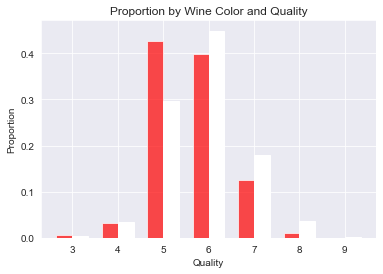

In [118]:
redwine_bars = plt.bar(ind, red_proportions, width, color = 'red', alpha = 0.7, label = 'Red Wine')
whitewine_bars = plt.bar(ind + width, white_proportions, width, color = 'white', label = 'White Wine')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Quality')
plt.title('Proportion by Wine Color and Quality')
coordinates_xlabels = ind + width / 2
xlabels_names = np.arange(3,10)
plt.xticks(coordinates_xlabels, xlabels_names);
